In [9]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb


my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))

In [10]:
expon = lambda theta: stat.expon(loc = theta)

In [41]:
theta = 10; samplesize = 1000;

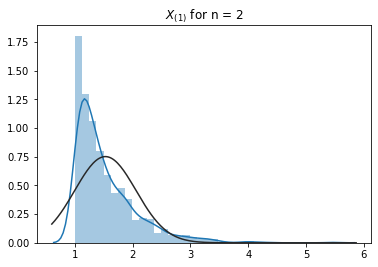

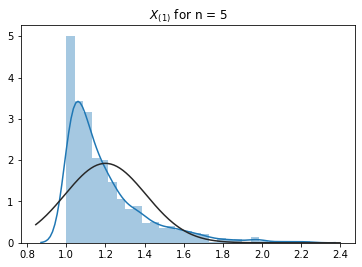

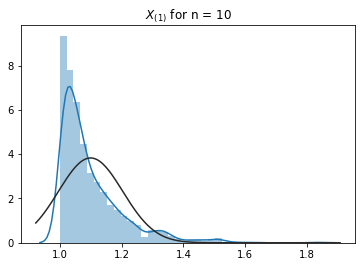

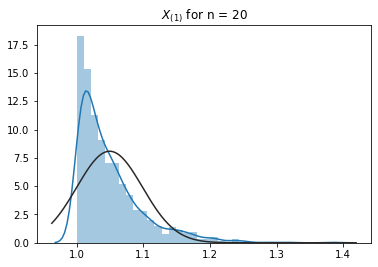

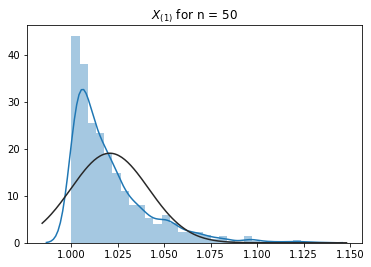

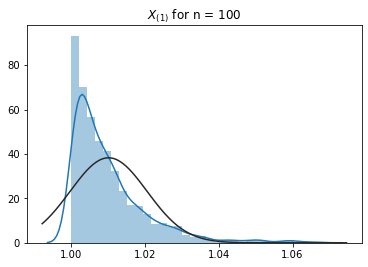

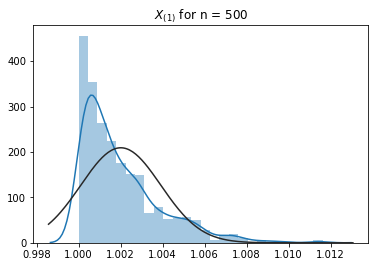

In [19]:
for n in [2, 5, 10, 20, 50, 100, 500]:
    min_sample = []
    for i in range(samplesize):
        min_sample.append(expon(theta).rvs(n).min())
    sb.distplot(min_sample, fit = stat.norm);
    plt.title("$X_{(1)}$ for n = " + str(n));
    plt.show()

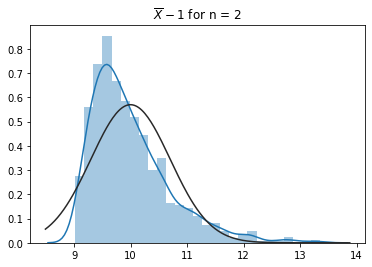

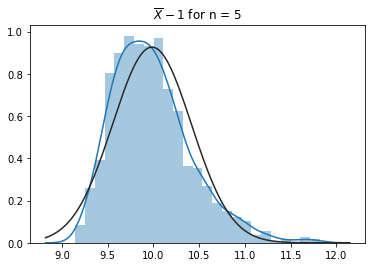

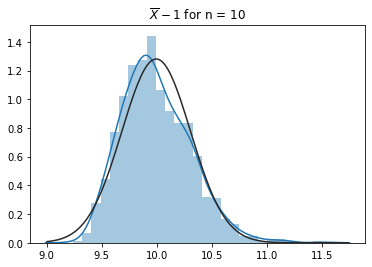

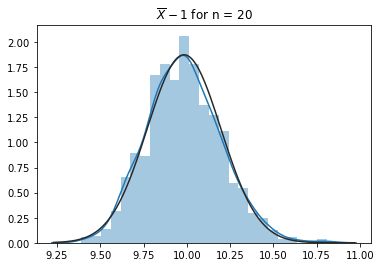

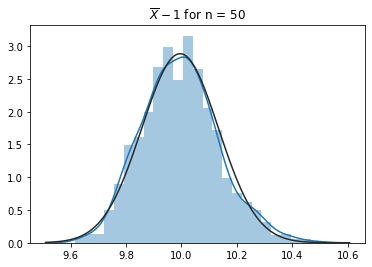

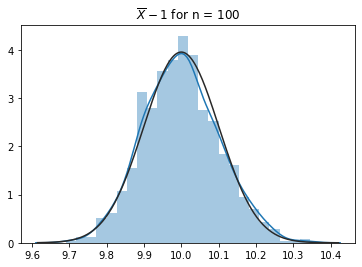

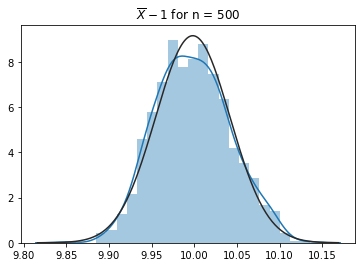

In [48]:
for n in [2, 5, 10, 20, 50, 100, 500]:
    sample = []
    for i in range(samplesize):
        sample.append(expon(theta).rvs(n).mean() - 1)
    sb.distplot(sample, fit = stat.norm);
    plt.title("$\\overline{X} - 1$ for n = " + str(n));
    plt.show()

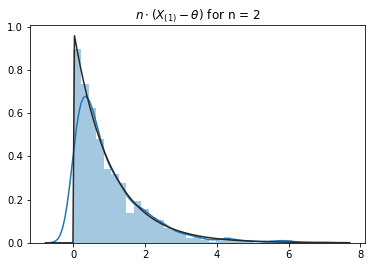

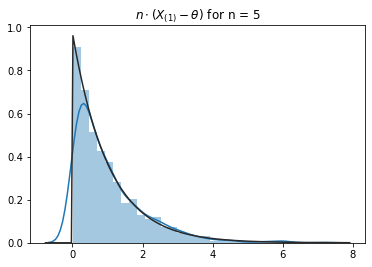

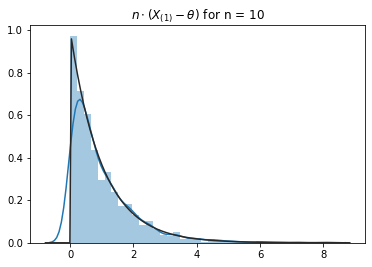

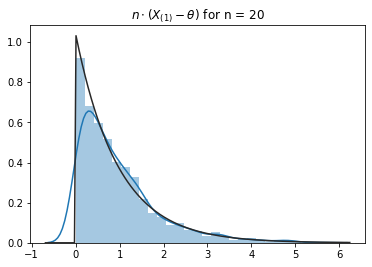

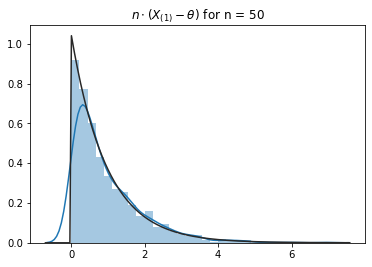

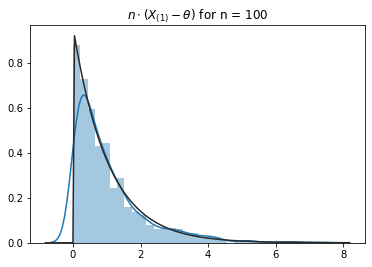

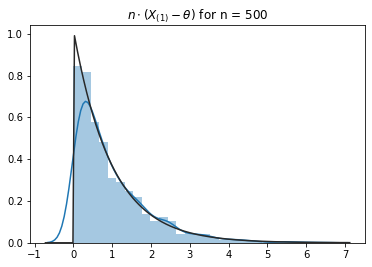

In [29]:
for n in [2, 5, 10, 20, 50, 100, 500]:
    sample = []
    for i in range(samplesize):
        sample.append(n * (expon(theta).rvs(n).min() - theta))
    sb.distplot(sample, fit = stat.expon);
    plt.title("$n \\cdot (X_{(1)} - \\theta)$ for n = " + str(n));
    plt.show()

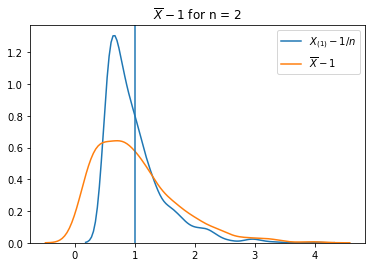

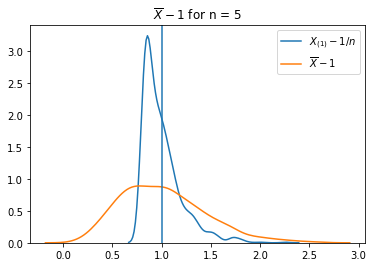

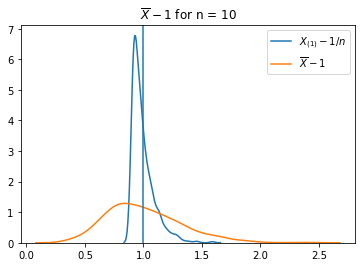

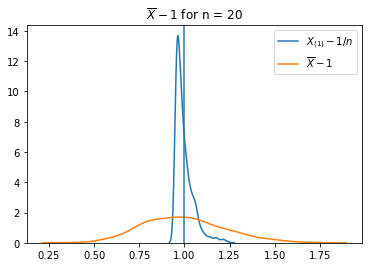

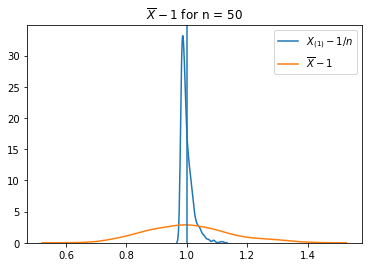

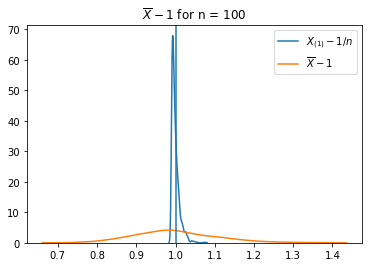

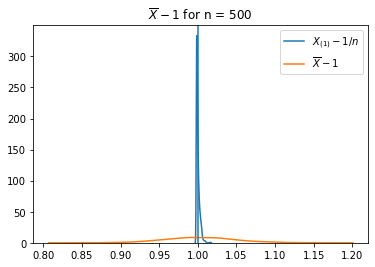

In [40]:
for n in [2, 5, 10, 20, 50, 100, 500]:
    data1 = []
    data2 = []
    for i in range(samplesize):
        sample = expon(theta).rvs(n);
        data1.append(sample.min() - 1 / n)
        data2.append(sample.mean() - 1)
    sb.distplot(data1, hist = False, label = '$X_{(1)} - 1 / n$');
    sb.distplot(data2, hist = False, label = '$\\overline{X} - 1$');
    plt.axvline(theta)
    plt.title("$\\overline{X} - 1$ for n = " + str(n));
    plt.show()

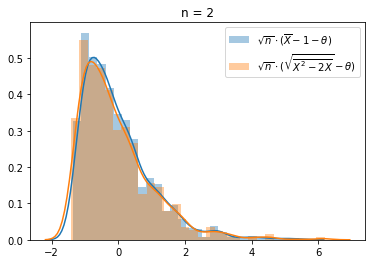

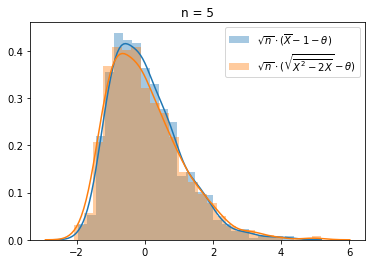

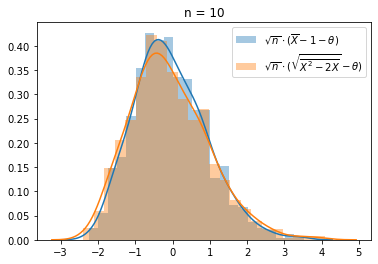

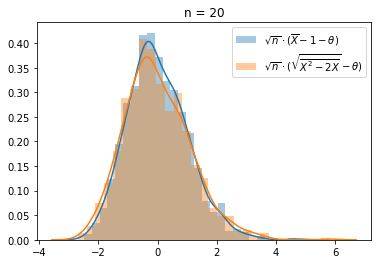

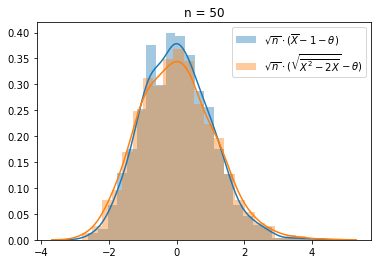

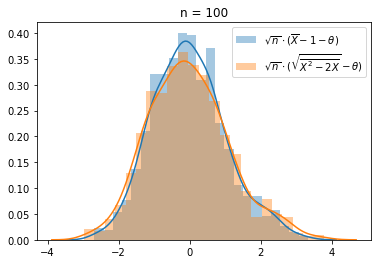

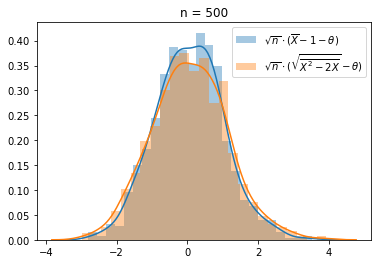

In [65]:
for n in [2, 5, 10, 20, 50, 100, 500]:
    data1 = []
    data2 = []
    theta = 10
    for i in range(samplesize):
        sample = expon(theta).rvs(n);
        sample_mod = np.array([i * (i - 2) for i in sample])
        #print(sample_mod.mean())
        data1.append(m.sqrt(n) * (sample.mean() - 1 - theta))
        
        #try:
        data2.append(m.sqrt(n) * (m.sqrt(sample_mod.mean()) - theta))
        #    break
        #except ValueError:
        #    print("Mean is less than two")
        
    sb.distplot(data1, label = '$\\sqrt{n} \\cdot (\\overline{X} - 1 - \\theta)$');
    sb.distplot(data2, label = '$\\sqrt{n} \\cdot (\\sqrt{\\overline{X^2 - 2X}} - \\theta)$');
    #plt.axvline(theta)
    plt.title("n = " + str(n));
    plt.legend()
    plt.show()